<a href="https://colab.research.google.com/github/dwifristanti/custom-model-object-detection/blob/master/custom_object_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Enable and Test GPU**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
print(tf.__version__)

2.5.0


## **Unzip the training_demo that consist of data, pipeline, etc**

In [4]:
!unzip /content/training_demo.zip

Archive:  /content/training_demo.zip
   creating: training_demo/
   creating: training_demo/annotations/
  inflating: training_demo/annotations/label_map.pbtxt  
  inflating: training_demo/annotations/test.record  
  inflating: training_demo/annotations/train.record  
  inflating: training_demo/exporter_main_v2.py  
  inflating: training_demo/export_tflite_graph_tf2.py  
  inflating: training_demo/generate_tfrecord.py  
   creating: training_demo/models/
  inflating: training_demo/models/pipeline.config  
  inflating: training_demo/model_main_tf2.py  
   creating: training_demo/New folder/
   creating: training_demo/pre-trained-models/


In [5]:
pwd

'/content'

## **Clone Tensorflow Models**

In [6]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57672, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 57672 (delta 32), reused 66 (delta 10), pack-reused 57578
Receiving objects: 100% (57672/57672), 572.87 MiB | 35.51 MiB/s, done.
Resolving deltas: 100% (39972/39972), done.


In [7]:
cd /content/models/research

/content/models/research


In [8]:
pwd

'/content/models/research'

## **Install Object Detection API**

In [9]:
#Protobuf Installation
!protoc object_detection/protos/*.proto --python_out=.

In [10]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [11]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [12]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [13]:
cp -r pycocotools /content/models/research

##### **Back to Research folder**

In [14]:
cd ..

/content/models/research/cocoapi


In [15]:
cd ..

/content/models/research


In [16]:
cp object_detection/packages/tf2/setup.py .

In [17]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 12.9MB/s 
     |████████████████████████████████| 358kB 48.3MB/s 
     |████████████████████████████████| 1.6MB 48.2MB/s 
     |████████████████████████████████| 829kB 42.2MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 153kB 58.9MB/s 
     |████████████████████████████████| 2.3MB 39.9MB/s 
     |████████████████████████████████| 38.2MB 68kB/s 
     |████████████████████████████████| 686kB 38.0MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 1.2MB 26.9MB/s 
     |████████████████████████████████| 174kB 59.8MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 645kB 41.6MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650889 sha256=b18681cdc7f421bc6ccd4cb1

In [18]:
#Test Installation
!python object_detection/builders/model_builder_tf2_test.py

2021-06-02 21:33:08.208948: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-02 21:33:10.159753: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 21:33:10.165106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 21:33:10.165669: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 21:33:10.165703: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

### **Clone Pre-trained-models**

In [19]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


In [20]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-06-02 21:34:08--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   287MB/s    in 1.3s    

2021-06-02 21:34:09 (287 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [21]:
!tar -xvf /content/training_demo/pre-trained-models/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


### **Train our custom models**

In [22]:
pwd

'/content/training_demo/pre-trained-models'

In [23]:
cd ..

/content/training_demo


In [24]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet50_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config

2021-06-02 21:40:37.006586: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 21:40:38.882104: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 21:40:38.887698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 21:40:38.888250: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 21:40:38.888290: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 21:40:38.890875: I tensorflow/stream_executor/platform/default

### **Export our model**

In [25]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet50_v1_fpn --output_directory /content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2

2021-06-02 21:56:11.141583: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 21:56:12.806916: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 21:56:12.812616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 21:56:12.813164: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 21:56:12.813202: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 21:56:12.830929: I tensorflow/stream_executor/platform/default

### **Export tflite-graph-tf2 models**

In [26]:
!python export_tflite_graph_tf2.py \
--pipeline_config_path /content/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config \
--trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet50_v1_fpn \
--output_directory /content/training_demo/exported-models/exported_models_v1/with-tflite-graph-tf2


2021-06-02 21:57:54.645845: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 21:57:56.264014: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-02 21:57:56.269523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-02 21:57:56.270094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-02 21:57:56.270131: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-02 21:57:56.272705: I tensorflow/stream_executor/platform/default

### **Zip our models folder**

In [27]:
!zip -r with-exporter-main-v2.zip /content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2

  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/ (stored 0%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/checkpoint/ (stored 0%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/checkpoint/checkpoint (deflated 41%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/checkpoint/ckpt-0.index (deflated 82%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/pipeline.config (deflated 68%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/saved_model/ (stored 0%)
  adding: content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2/saved_model/saved_model.pb (deflated 93%)
  adding: content/trainin

### **Inferencing our models**

Loading model...Done! Took 19.21009588241577 seconds
Running inference for /content/training_demo/images/val/bed (1).jpg... Done


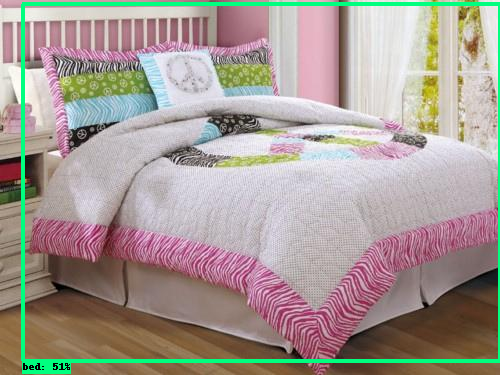

In [28]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/val/bed (1).jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/exported_models_v1/with-exporter-main-v2'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

### **Upload model to gdrive** 

In [30]:
cp -r /content/training_demo/exported-models/exported_models_v1 /content/drive/MyDrive/kaggle/exported_model_v1

### **Convert Model to TFLite**

In [33]:
#Quantize and Convert it
!toco --graph_def_file /content/training_demo/exported-models/exported_models_v1/with-tflite-graph-tf2/saved_model/saved_model.pb \
    --output_file /content/training_demo/exported-models/tflite-converted-model/quantized-furniture-detector.tflite \
    --saved_model_dir /content/training_demo/exported-models/exported_models_v1/with-tflite-graph-tf2/saved_model \
    --output_format TFLITE \
    --inference_type FLOAT \
    --inference_input_type FLOAT \
    --input_arrays input \
    --output_arrays output \
    --post_training_quantize

In [55]:
!pip install tflite-support

     |████████████████████████████████| 1.1MB 6.6MB/s 
     |████████████████████████████████| 194kB 33.7MB/s 


### According to [Tensorflow Documentation](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/running_on_mobile_tf2.md)



In [74]:
cd /content/models/research

/content/models/research


In [75]:
# From the tensorflow/models/research/ directory
!python object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/training_demo/exported-models/exported_models_v1/exporter-main-v2/pipeline.config \
    --trained_checkpoint_dir /content/training_demo/exported-models/exported_models_v1/exporter-main-v2/checkpoint \
    --output_directory /content/training_demo/exported-models/export-tflite-graph

W0602 23:34:08.591715 140594764220288 save_impl.py:77] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7fde50272fd0>, because it is not built.
W0602 23:34:54.409524 140594764220288 save.py:243] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 520). These functions will not be directly callable after loading.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)

FOR DEVS: I

In [88]:
!tflite_convert \
--output_file=/content/training_demo/exported-models/tflite-model/tflite_model/furniture-detector-v1.tflite \
--saved_model_dir=/content/training_demo/exported-models/two_export-tflite-graph/saved_model

### **Write Metadata to custom object detection model**

In [79]:
import os
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

""" ... """
"""Creates the metadata for an image classifier."""

# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Furniture Detector"
model_meta.description = ("Identify the most prominent object in the "
                          "image from a set of 5 categories such as "
                          "bed,chair,sofa,swivelchair,table.")
model_meta.version = "v1"
model_meta.author = "Dejays Yellow"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")

In [80]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()

In [85]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

# Creates outputs info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2

output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("/content/training_demo/exported-models/labels.txt")
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]

output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2

output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())

# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta,
    output_number_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [89]:
populator = _metadata.MetadataPopulator.with_model_file('/content/training_demo/exported-models/tflite-model/tflite_model/furniture-detector-v1.tflite')
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(['/content/training_demo/exported-models/labels.txt'])
populator.populate()

### **FINAL: SAVE ALL PROJECT TO GOOGLE DRIVE**

In [92]:
cp -r /content/training_demo /content/drive/MyDrive/BANGKIT\ 2021/Capstone\ Project